# ¡Hola, Valeria!  

Mi nombre es Carlos Ortiz, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

## Paso 1. Datos e información general

* Este dataset contiene las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos, datos que están disponibles en fuentes abiertas.
* **Objetivo:** Identificar patrones que determinen si un juego tiene éxito o no, para detectar proyectos prometedores y planificar campañas publicitarias.

* Los datos que se remontan a 2016 y esto es para la campaña que se está planeando para 2017.

### Información de las columnas del dataset `games`

* `Name` - Nombre)
* `Platform` - Plataforma
* `Year_of_Release` - Año de lanzamiento
* `Genre` - (Género)
* `NA_sales` - (ventas en Norteamérica en millones de dólares estadounidenses)
* `EU_sales` - (ventas en Europa en millones de dólares estadounidenses)
* `JP_sales` - (ventas en Japón en millones de dólares estadounidenses)
* `Other_sales` - (ventas en otros países en millones de dólares estadounidenses)
* `Critic_Score` - (máximo de 100)
* `User_Score` - (máximo de 10)
* `Rating` - (ESRB)

Es posible que los datos de 2016 estén incompletos

### Contenido
1. Datos e información general
1.1 Información general del dataset `games`
2. Preprocesamiento de datos
2.1 Preprocesando `name`
2.2 Preprocesando `year_of_release`
2.3 Preprocesando `critic_score` 
2.4 Preprocesando`user_score`
2.5 Preprocesando `rating`
3. Análisis de Datos
4. Perfil para cada región
4.1 Norteamérica
4.2 Europa
4.3 Japón
5. Prueba de hipótesis
5.1 Calificaciones promedio para XOne y PC
5.2 Calificaciones promedio para Acción y Deportes
6. Conclusión

In [1]:
import pandas as pd
import math
from datetime import datetime
import numpy as np
from scipy import stats as st
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt 
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games.info()
# Algunas columnas tienen valores ausentes
# name
# platform
# critic_score
# user_score
# rating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Paso 2. Preprocesamiento de datos

### Preprocesando `name`

In [2]:
games = games.rename(columns=str.lower)
games['name'] = games['name'].str.lower()
games.head(15)
# Convirtiendo los nombres de las columnas a todo en minusculas

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games[games['name'].isnull()] # Verificando valores ausentes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [4]:
games = games.dropna(subset= ['name']).reset_index(drop=True)
games.isnull().sum()
# Dropping las filas con valores ausentes de name ya que no representan ni el 1% del dataframe y no hay mucha información por recuperar en sus columnas.

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien. Al ser tan pocos datos no nos afectará el eliminarlos.
</div>

### Preprocesando `year_of_release`

In [5]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [6]:
games['year_of_release'].isna().sum() #Verificando valores ausentes

269

Los valores ausentes van a ser rellenados con el valor de año máximo de acuerdo con el nombre del videojuego para saber exactamente qué juego se va a llenar con qué año, pensando que si no hay un registro es por que es nuevo.

In [7]:
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release'].transform('max'))
games['year_of_release'].fillna(0, inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


En la columna de `year_of_release` tenemos originalmente 269 valores ausentes y recuepramos 123 datos, rellenamos los demás valores con 0 para hacer más fácil el posterior análisis de las ventas por año, análisis en el que consideraremos solamente los videojuegos vendidos en años más recientes. Y utilizaremos este mismo método con `critic_score`y `user_score`.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

### Preprocesando `critic_score`

In [8]:
games.critic_score.isna().sum()


8576

In [9]:
def fill_nan_max(selection):
        if len(selection) == 0:
            return np.nan        
        else:
            return selection.max()
games['critic_score'] = (games['critic_score'].fillna(games.groupby(['name'])['critic_score'].transform(fill_nan_max)))
games['critic_score'].isna().sum()

7615

In [10]:
games['critic_score'] #Estos así se quedan, ok

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16708     NaN
16709     NaN
16710     NaN
16711     NaN
16712     NaN
Name: critic_score, Length: 16713, dtype: float64

### Preprocesando `user_score`

In [11]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [12]:
games['user_score'] = games['user_score'].replace('tbd',np.nan)        
games['user_score'] = (games['user_score'].fillna(games.groupby(['name'])['user_score'].transform(fill_nan_max)))
games['user_score'].isna().sum()

8024

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       8689 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Hasta ahora hemos cambiado el tipo del algunos datos para tener más orden en el análisis según los valores de cada columna. Tenemos nombre plataforma y género como objetos, no son valores numéricos.
Tenemos el año de lanzamiento y el puntaje de la crítica como valores enteros, ya que el máximo puntaje en `critic_score` es de 100.
Las ventas y la `user_score` de los videojuegos (con máximo de 10) si considera decimales en sus valores así que los hemos dejado como float64s.

In [14]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Hasta ahora algunos valores ausentes han sido imputados. Comenzamos con `name` primero eliminando 2 fila sin datos suficientes. Seguimos con `year_of_release`, `critic_score` y `user_score`, en los cuales rellenamos algunos valores según el nombre del videojuego, los cuales serán descartados para el posterior análisis. Continuaremos con la columna de `rating` y `platform`.

Estos valores ausentes podrían existir en el dataframe debido a errores de registro y algunos más recientes podrían no tener ciertos valores de scoring/rating por ser relativamente recientes sin tiempo de haber realizado la captura de los valores de scoring.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Al igual que con la columna anterior, la modificación de los valores puede sesgar las conclusiones. El cambio de `tbd` es apropiado así como la transformación del tipo de dato pero no así con la imputación de los datos faltantes.
</div>

<div class="alert alert-block alert-info">
<a class="tocSkip"></a>adiós fillna?
</div>

<div class="alert alert-block alert-info">

En algunos casos nos toca dejarlo a un lado. 
</div>

### Preprocesando `rating`

In [15]:
games['rating'].isna().sum()

6764

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
rating_dict = {'E': 1, 'T':2,'M':3,'E10+':4,'EC':5,'RP':6,'K-A':7,'AO':8}
games['rating_id'] = games['rating'].replace(rating_dict)  
games['rating_id'] = games['rating_id'].fillna(games.groupby(['name'])['rating_id'].transform('max'))
games['rating'] = games['rating'].fillna(games.groupby(['name'])['rating_id'].transform('max'))
games['rating_id'] = games['rating_id'].fillna(0)
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1.0
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,0.0
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1.0
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1.0
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,0.0
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,0.0
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,1.0
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,1.0
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,1.0
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,0.0


In [18]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7615
user_score         8024
rating             6327
rating_id             0
dtype: int64

In [19]:
games['total_profit'] = (games['na_sales'] + games['eu_sales'] +  games['jp_sales'] + games['other_sales'])
games
# Ganancias totales por videjuego, en millones de dólares USD

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id,total_profit
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1.0,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,0.0,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1.0,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1.0,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,0.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.0,0.01
16709,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.0,0.01
16710,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.0,0.01
16711,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.0,0.01


In [20]:
games.duplicated().sum() #No hay duplicados en el dataframe

0

In [21]:
games['year_of_release'].fillna(0, inplace=True)
games['rating_id'].fillna(0, inplace=True)
games['critic_score'].fillna(0, inplace=True)
games['user_score'] = pd.to_numeric(games['user_score'],errors='coerce')
try: 
    games['year_of_release']   = games['year_of_release'].astype('int')
    games['critic_score']   = games['critic_score'].astype('int')
    games['rating_id']   = games['rating_id'].astype('int')    
except: 
    print('Nope')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       8689 non-null   float64
 10  rating           10386 non-null  object 
 11  rating_id        16713 non-null  int64  
 12  total_profit     16713 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.7+ MB


Hasta aquí hemos recuperado los datos de la mayoría de las columnas y hemos creado una nueva columna que nos muestra las ganancias totales de los videojuegos en todas las regiones y un ID para cada tipo de rating, numérico para hacer más fácil el fillna.

<div class="alert alert-block alert-info">
<a class="tocSkip"></a>Creo que ya hice el valor default 0 para los datos ausentes con la columna de rating ID. y pues ya no hay fillnas arriba
</div>

## Paso 3. Análisis de Datos

Primero vamos a analizar el volumen de videojuegos vendidos en millones de dólares (USD) que tenemos a través del tiempo.

<AxesSubplot:xlabel='year_of_release'>

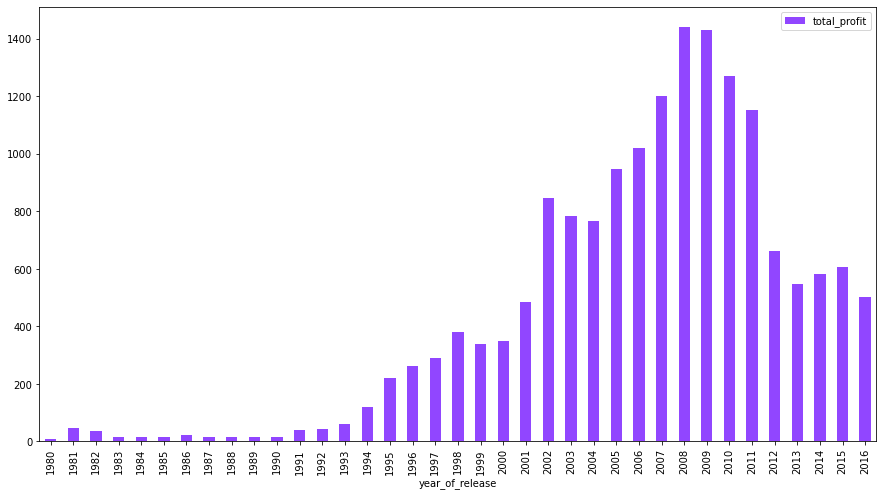

In [22]:
profit_by_platforms = games.query('year_of_release != 0').pivot_table(index='year_of_release', values='total_profit', aggfunc='count')
profit_by_platforms.plot(kind='bar', figsize=(15, 8), color='#9146FF')

Podemos ver que desde 1996 hasta el 2006 ha habido una subida y bajada en la cantidad de juegos que han sido vendidos. Son dos décadas de unidades vendidas en las que podemos ver que del periodo 2005-2011 hubo mayores ventas que los años anteriores y posteriores.

<AxesSubplot:xlabel='platform'>

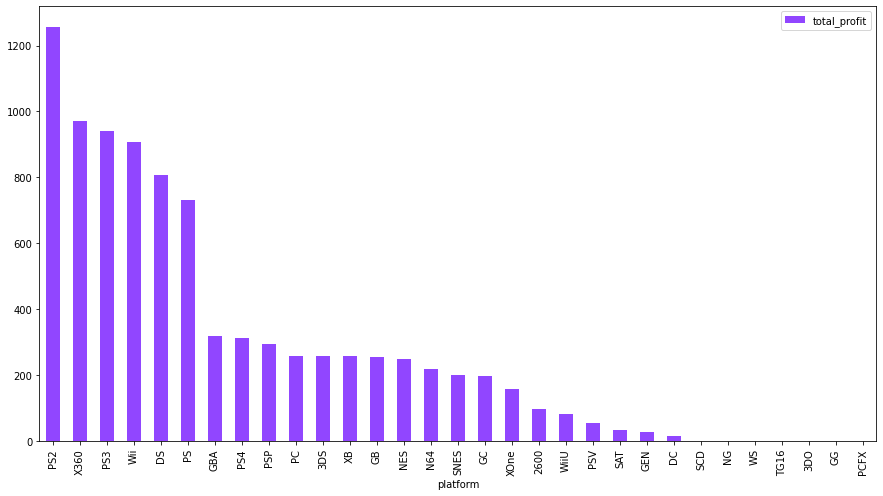

In [23]:
profit_by_platforms = games.pivot_table(index='platform', values='total_profit', aggfunc='sum')
profit_by_platforms.sort_values(by = 'total_profit', ascending = False, inplace = True)  
profit_by_platforms.plot(kind='bar', figsize=(15, 8), color='#9146FF')

Ahora vemos que las plataformas más populares son PS2, X360, PS3, Wii y DS conformado el top 5 de las ventas totales independientemente del valor del año. Vamos a analizar sus ventas de estas 5 plataformas más populares através del tiempo.

<AxesSubplot:xlabel='year_of_release'>

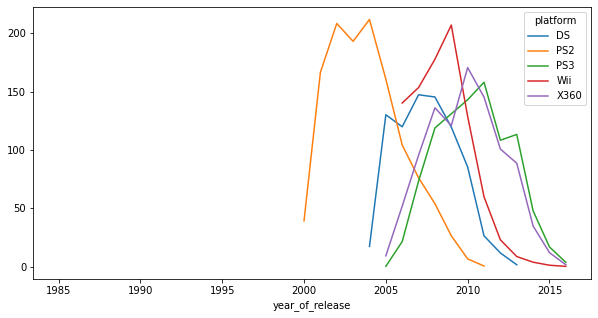

In [24]:
profit_by_year = games.query('year_of_release != 0 & platform == ("PS2", "X360", "PS3", "Wii", "DS")').pivot_table(index='year_of_release', columns= 'platform', values='total_profit', aggfunc='sum')
profit_by_year.plot(kind='line', figsize=(10, 5))

En 2005 la plataforma PS2 tuvo una caída en las ventas, mientras que las otras plataformas comenzaban a subir las suyas al rededor de ese mismo. Ahora vmaos a analizar como ha cambiado la popularidad de las plataformas a través de los años de acuerdo con la suma total de la columna `total_profit` para cada una de ellas. 

<AxesSubplot:xlabel='platform'>

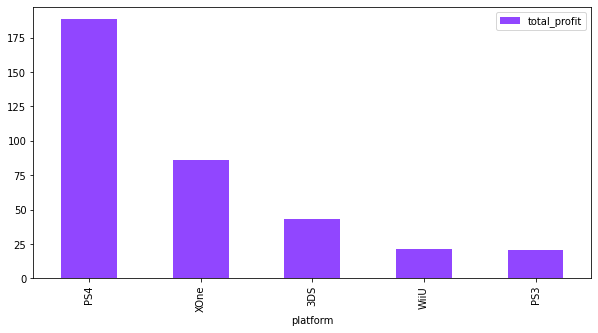

In [25]:
new_top_sales = games.query('year_of_release >= 2015').pivot_table(index='platform', values='total_profit', aggfunc='sum').sort_values(by='total_profit', ascending=False).head(5)
new_top_sales.plot(kind='bar', figsize=(10, 5), color='#9146FF') #Las 5 plataformas más populares a partir del 2015 en adelante.

<AxesSubplot:xlabel='platform'>

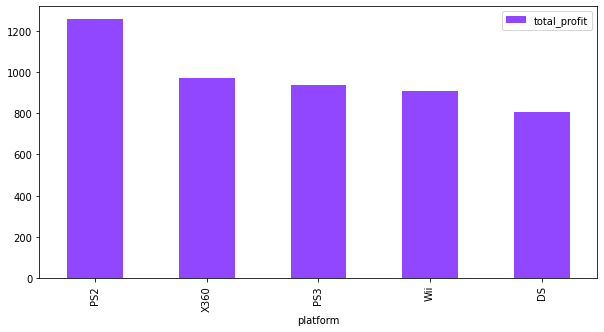

In [26]:
old_top_sales = games.query('year_of_release <= 2015').pivot_table(index='platform', values='total_profit', aggfunc='sum').sort_values(by='total_profit', ascending=False).head(5)
old_top_sales.plot(kind='bar', figsize=(10, 5), color='#9146FF') #Las 5 plataformas más populares antes del 2015.

Con estos resultados podemos observar que las distintas plataformas han logrado mantener popularidad en el mercado gracias a la evolución las consolas através del tiempo. PlayStation, Xbox y Nintendo (Wii y DS) son las plataformas más populares, siendo las versiones más actualizadas de cada una las que van obteniendo popularidad conforme las versiones antiguas van pasando de moda. Ahora vamos a determinar el tiempo de vida promedio que tienen las plataformas de videojuegos desde que son lanzadas al mercado hasta que pierden popularidad y surgen las nuevas versiones. Esto lo haremos restando el año mínimo de la plataforma (primr año de ventas) del máximo (último año de ventas).

In [27]:
years_mean = (games.query('year_of_release != 0').groupby('platform')['year_of_release'].max() - games.query('year_of_release != 0').groupby('platform')['year_of_release'].min()).mean()
print('Las plataformas tienen un promedio general de vida de {:0.0f} años'.format(years_mean))

Las plataformas tienen un promedio general de vida de 8 años


Como hemos visto, las plataformas tienen un tiempo de vida de 8 años aproximadamente, lo que quiere decir que para el forecast de ventas del año 2017 vamos a tomar datos que comiencen desde 2013 para elegir las plataformas más populares/rentables para la campaña del próximo año.

<AxesSubplot:xlabel='year_of_release'>

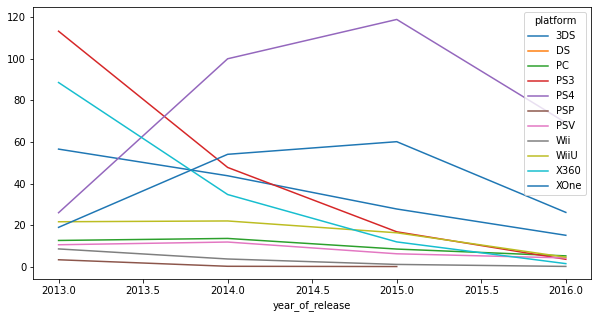

In [28]:
bench_platforms = games.query('year_of_release >= 2013').pivot_table(index='year_of_release', columns= 'platform', values='total_profit', aggfunc='sum')
bench_platforms.plot(kind='line', figsize=(10, 5))

Hay algunas plataformas que desde el 2013 podrían estar already en su etapa de declive en la popularidad como lo podemos ver en la grafica de arriba, podemos ver que de los años anteriores algunas plataformas van en descenso. Algunas otras no lograron ascneder significativamente en ventas y tenemos las más recientes que están aumentando en las ventas de videjuegos que tienen. Podemos ver en la tabla de abajo cuáles son las plataformas que actualmente son líderes en ventas. Hay que tomar en cuenta que algunos datos del 2016 podrían no estar completamente registrados y las ventas sean mayores de lo que se puede observar para ese año.

**Las plataformas con mayor rentabilidad de acuerdo con las gráfica de líneas serían `PS4` y `XOne`.**

<AxesSubplot:>

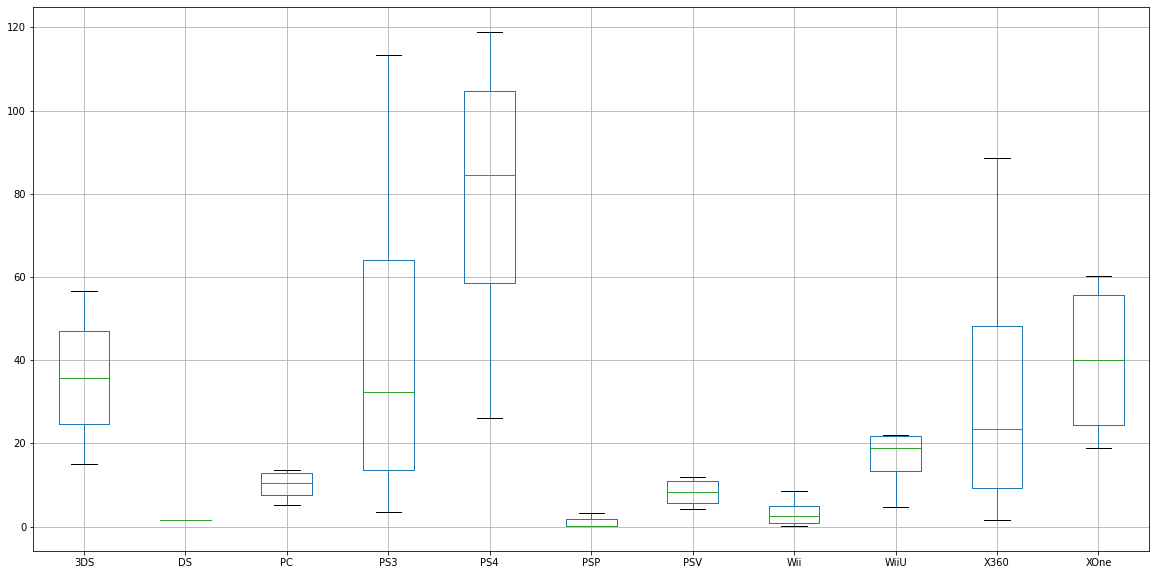

In [29]:
choosen_games = games.query('year_of_release >=2013 & year_of_release != 0')
choosen_games.pivot_table(index='year_of_release', columns= 'platform', values='total_profit', aggfunc='sum').boxplot(figsize=(20,10))

En esta gráfica de cajas podemos ver que los valores medios en ventas por plataforma a partir del año 2013 que tomamons como referencia de tiempo promedio de vida de una consola desde el 2016 en retroceso, lucen muy diferentes de cada una, eso puede ser debido a que cada plataforma durante este periodo de tiempo 2013-2016 está en momentos de su ciclo de vida y por ende tienen todas una media distinta. También podemos ver con mayor facilidad que las ventas para PS4 y XOne son las más altas dentro de las paltaformas de este grupo.

**Correlación:** En esta sección vamos a observar cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular con un gráfico de dispersión y en donde se calcule correlación entre las reseñas y las ventas.

<AxesSubplot:xlabel='total_profit', ylabel='critic_score'>

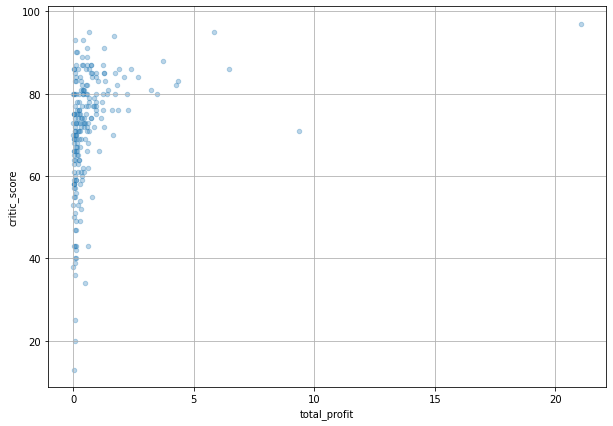

In [30]:
choosen_games.query('platform == "PS3" & critic_score != 0').plot(kind='scatter', x='total_profit', y='critic_score', grid=True, figsize=(10,7), alpha=0.3)

<AxesSubplot:xlabel='total_profit', ylabel='user_score'>

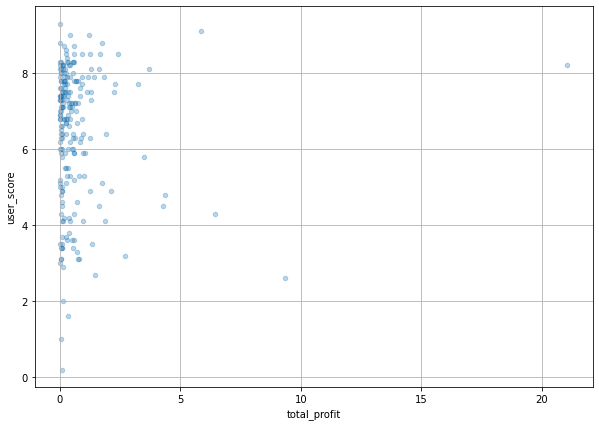

In [31]:
choosen_games.query('platform == "PS3" & user_score != 0').plot(kind='scatter', x='total_profit', y='user_score', grid=True, figsize=(10,7), alpha=0.3)

In [32]:
corr_work = choosen_games.query('platform == "PS4, " & critic_score != 0 & user_score != 0').corr()['total_profit']
corr_work[['critic_score','user_score']]

critic_score   NaN
user_score     NaN
Name: total_profit, dtype: float64

Aquí podemos ver las gráficas de dispersión de la correlación entre la plataforma PS4 que es la plataforma seleccionada por su capacidad de rentabilidad. Se está relacionando la cantidad de ventas totales por región y se puede observar en los resultados que ni el valor de las reviews de usuarios y expertos impacta las ventas significativamente. Abajo podemos ver que la correlación no es muy alta para las demás plataformas que fueron seleccionadas desde el 2009.

In [33]:
correlations_user = choosen_games[['platform', 'total_profit', 'user_score']]
correlations_user.reset_index(drop=True)
correlations_user = correlations_user.groupby('platform')['user_score'].corr(choosen_games['total_profit'])
correlations_critic = choosen_games[['platform', 'total_profit', 'critic_score']]
correlations_critic.reset_index(drop=True)
correlations_critic = correlations_critic.groupby('platform')['critic_score'].corr(choosen_games['total_profit'])
correlations = pd.merge(correlations_user,
                 correlations_critic,
                 on='platform', 
                 how='right')
correlations

,user_score,critic_score
platform,,
3DS,0.272276,0.048972
DS,-0.672927,-0.020919
PC,-0.101889,0.198521
PS3,0.003173,0.269092
PS4,-0.023137,0.220342
PSP,-0.260383,0.523782
PSV,0.034377,0.352620
Wii,0.314703,0.522629
WiiU,0.389599,0.255605


Ahora vamos a revisar los mismos juegos desde ese periodo, pero de acuerdo con su conteo de total ventas de acuerdo con el género del videojuego al que pertenecen.

Text(0.5, 1.0, 'Distribución de videojuegos por Género: Unidades vendidas y Ganancias')

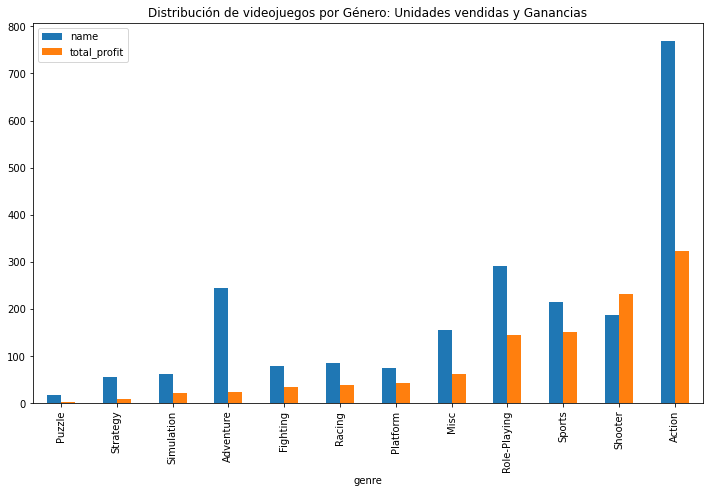

In [34]:
genre_count = choosen_games.pivot_table(index = 'genre', values = 'name', aggfunc = 'count') # Número de juegos lanzados
genre_profit = choosen_games.pivot_table(index = 'genre', values = 'total_profit', aggfunc = 'sum') # Ventas totales
genre_info = pd.merge(genre_count,
                 genre_profit,
                 on='genre', 
                 how='right')
genre_info.sort_values(by='total_profit', ascending=True).plot(kind='bar', figsize=(12, 7))
plt.title('Distribución de videojuegos por Género: Unidades vendidas y Ganancias')

In [35]:
genre_info.sort_values(by='total_profit', ascending=False)

,name,total_profit
genre,,
Action,769,322.50
Shooter,187,232.98
Sports,214,150.65
Role-Playing,292,145.89
Misc,156,63.06
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


Después de este breve análisis sobre los géneros de videojuegos podemos observar que aquellos que estpand entro de la categoría de Action, Shooter y Sports son los más populares con mayor número de ventas, siendo estos los más probables a tener una buena rentabilidad para los proximos años. Mientras que Puzzle, Strategy y Simulation son los que tienen menos ventas desde el 2009.

## **Paso 4. Perfil para cada región.**

En esta sección vamos a determinar las cinco plataformas principales, describiendo las variaciones en sus cuotas de mercado de una región a otra,
los cinco géneros principales y explicaremos si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Norteamérica

In [36]:
choosen_plat_na = choosen_games.query('na_sales != 0')
choosen_plat_na = (choosen_plat_na.pivot_table(index = 'platform', 
                                     values = 'total_profit', 
                                     aggfunc = 'sum')
                             .sort_values(by = 'total_profit', 
                              ascending = False)                                
              )
total_profit_na = choosen_plat_na['total_profit'].sum()
choosen_plat_na['share_profit'] = choosen_plat_na['total_profit'] / total_profit_na * 100
choosen_plat_na['share_profit'].head() # Estas son las 5 plataformas principales en ventas para la región de Norteamérica

platform
PS4     30.237887
PS3     16.824176
XOne    15.636217
X360    13.422561
3DS     11.052544
Name: share_profit, dtype: float64

In [37]:
choosen_genre_na = (choosen_games.pivot_table(index = 'genre', 
                                   values = 'total_profit', 
                                   aggfunc = 'sum' )
                         .sort_values(by = 'total_profit', 
                          ascending = False)                                
                    )

choosen_genre_na['share_profit'] = choosen_genre_na['total_profit'] / total_profit_na * 100
choosen_genre_na['share_profit'].head(5) # Los 5 géneros más popoulares en NA.

genre
Action          31.714968
Shooter         22.911483
Sports          14.815070
Role-Playing    14.346967
Misc             6.201383
Name: share_profit, dtype: float64

### Europa

In [38]:
choosen_plat_eu = choosen_games.query('eu_sales != 0')
choosen_plat_eu = (choosen_plat_eu.pivot_table(index = 'platform', 
                                     values = 'total_profit', 
                                     aggfunc = 'sum')
                             .sort_values(by = 'total_profit', 
                              ascending = False)                                
              )
total_profit_eu = choosen_plat_eu['total_profit'].sum()
choosen_plat_eu['share_profit'] = choosen_plat_eu['total_profit'] / total_profit_eu * 100
choosen_plat_eu['share_profit'].head()

platform
PS4     30.157574
PS3     16.579235
XOne    15.615681
X360    13.227956
3DS     10.832357
Name: share_profit, dtype: float64

In [39]:
choosen_genre_eu = (choosen_games.pivot_table(index = 'genre', 
                                   values = 'total_profit', 
                                   aggfunc = 'sum' )
                         .sort_values(by = 'total_profit', 
                          ascending = False)                                
                    )

choosen_genre_eu['share_profit'] = choosen_genre_eu['total_profit'] / total_profit_na * 100
choosen_genre_eu['share_profit'].head()

genre
Action          31.714968
Shooter         22.911483
Sports          14.815070
Role-Playing    14.346967
Misc             6.201383
Name: share_profit, dtype: float64

### Japón

In [40]:
choosen_plat_jp = choosen_games.query('jp_sales != 0')
choosen_plat_jp = (choosen_plat_jp.pivot_table(index = 'platform', 
                                     values = 'total_profit', 
                                     aggfunc = 'sum')
                             .sort_values(by = 'total_profit', 
                              ascending = False)                                
              )
total_profit_jp = choosen_plat_jp['total_profit'].sum()
choosen_plat_jp['share_profit'] = choosen_plat_jp['total_profit'] / total_profit_jp * 100
choosen_plat_jp['share_profit'].head()

platform
PS4     35.652654
PS3     19.428179
3DS     18.318997
X360     8.647310
WiiU     7.223142
Name: share_profit, dtype: float64

In [41]:
choosen_genre_jp = (choosen_games.pivot_table(index = 'genre', 
                                   values = 'total_profit', 
                                   aggfunc = 'sum' )
                         .sort_values(by = 'total_profit', 
                          ascending = False)                                
                    )

choosen_genre_jp['share_profit'] = choosen_genre_jp['total_profit'] / total_profit_jp * 100
choosen_genre_jp['share_profit'].head()

genre
Action          43.411541
Shooter         31.361305
Sports          20.278911
Role-Playing    19.638170
Misc             8.488471
Name: share_profit, dtype: float64

Para Norteamérica podemos observar que las plataformas más populares cueron PS3, X360, Wii, PS4 y 3DS, y los géneros más populares son Action, Shooter, Sports, Role-PLaying y Misc respectivamente. Tanto en Europa como en Japón las plataformas y los géneros son igualmente populares, con la única diferencia de que Wii en Japón es la menos popular contra la 3DS y PS4.

Ahora vamos a analizar como es que el rating ESRB afecta las ventas individuales por región.

In [42]:
esrb_sales_na = choosen_games[['platform', 'na_sales', 'rating_id']]
esrb_sales_na.reset_index(drop=True)
esrb_sales_na = esrb_sales_na.groupby('platform')['rating_id'].corr(choosen_games['na_sales'])
esrb_sales_eu = choosen_games[['platform', 'eu_sales', 'rating_id']]
esrb_sales_eu.reset_index(drop=True)
esrb_sales_eu = esrb_sales_eu.groupby('platform')['rating_id'].corr(choosen_games['eu_sales'])
esrb_corr = pd.merge(esrb_sales_na,
                 esrb_sales_eu,
                 on='platform', 
                 how='right')
esrb_sales_jp = choosen_games[['platform', 'jp_sales', 'rating_id']]
esrb_sales_jp.reset_index(drop=True)
esrb_sales_jp = esrb_sales_jp.groupby('platform')['rating_id'].corr(choosen_games['jp_sales'])
esrb_corr = pd.merge(esrb_corr,
                 esrb_sales_jp,
                 on='platform', 
                 how='right')
esrb_corr

,rating_id_x,rating_id_y,rating_id
platform,,,
3DS,0.009035,0.009085,-0.127996
DS,0.124916,-0.272260,NaN
PC,0.245651,0.150118,NaN
PS3,0.192934,0.159477,-0.004286
PS4,0.115980,0.099962,-0.033589
PSP,NaN,0.206341,0.454649
PSV,0.373469,0.314013,0.047858
Wii,0.614375,0.611486,-0.280611
WiiU,-0.054234,-0.006862,-0.134475


En la tabla anterior, tenemos la correlación entre las ventas de cada región y el rating de ESRB. Podemos observar en los resultados que los ratings afectan poco a las ventas en las distintas regiones, en algunas menos que en otras. Para norteamérica, las ventas de cada plataforma en general se ven poco afectadas pro el rating, con excepción de la consola PS2, la cuál tiene una correlación mayor que las demás. En Europa, la PS2 es de igual forma la plataforma que mayor impacto tiene en ventas debido al rating, pero en Japón no es el caso. Las demás consolas no tienen una correlación significativa entre ventas y rating.

## **Paso 5. Prueba de Hipótesis.**



### 1. Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas.

* Comenzaremos con una prueba de Levene para detemrinar la homocedasticidad (igualdad de varianzas) de las muestras, en este caso las plataformas con respecto de la columna `user_score`. Si el valor de pvalue es menor al comparar ambas varianzas, esto significará que las varianzas no son iguales, hay diferencias. Si es mayor quiere decir que son iguales, y según el resultado de esta prueba proseguiremos a una prueba de T.

* **H0** = Las calificaciones promedio de los usuarios Xbox One y PC son iguales.
* **H1** = Las calificaciones promedio de los usuarios Xbox One y PC son diferentes.

In [43]:
one_scores = choosen_games.query('platform == "XOne"')['user_score'].dropna()
pc_scores = choosen_games.query('platform == "PC"')['user_score'].dropna()

In [44]:
results = st.levene(one_scores, pc_scores, center='mean')
alpha= 0.05
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.0005284276589650333
Rechazamos la hipótesis nula


Debido a que el valor de pvalue para esta prueba de Levene es menor que 0.05, esto significa que sí hay diferencias en las varianzas, por lo tanto rechazamos la hipótesis nula y concluimos que las calificaciones promedio de los usuarios de XOne y PC **son diferentes** en varianza. Con este resultado pasaremos a la prueba de T con un valor `False`para `equal_var`.

In [45]:
results = st.ttest_ind(one_scores, pc_scores, equal_var=False)
alpha= 0.05
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.03533507254527675
Rechazamos la hipótesis nula


Con este resultado podemos concluir que las calificaciones promedio de los usuarios de XOne y PC sí son diferentes.

### 2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

* **H0** = Las calificaciones promedio de los usuarios para géneros de Acción y Deportes son iguales.
* **H1** = Las calificaciones promedio de los usuarios para géneros de Acción y Deportes son diferentes

In [46]:
action_score = choosen_games.query('genre == "Action"')['user_score'].dropna()
sports_score = choosen_games.query('genre == "Sports"')['user_score'].dropna()

In [47]:
results = st.levene(action_score, sports_score, center='mean')
alpha= 0.05
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.8589972239174216e-07
Rechazamos la hipótesis nula


In [48]:
results = st.ttest_ind(action_score, sports_score, equal_var=False)
alpha= 0.05
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 2.8348202610235494e-24
Rechazamos la hipótesis nula


Para esta segunda prueba de hipótesis estamos tomando en cuenta también las calificaciones de los usuarios, esta vez por género de Acción y Deportes. En la prueba de Levene para comparar las varianzas rechazamos la hipótesis nula. Posteriormente para la prueba de T, tomamos equal_var como False debido a los resultados de Levene al rechazar la hipótesis nula. Finalmente, con los resultados de la prueba de T podemos concluir que las calificaciones para ambos géneros son **diferentes**.

## **Paso 6. Conclusión**

* Trabajando con estos datos lo que hicimos primero fue preprocesarlos. Para esto primero, verificamos los valores nulos en las columnas. Nos deshicimos de 2 filas que no tenían la cantidad suficiente de datos para ser imputadas, representaban el 1% del dataframe. Algunos otros valores que sí imputamos/transformamos fueron los de la columna de `year_of_release`,`critic_score` y `user_score`.

* Analizando los datos ya limpios y restaurados, llegamos a la conclusión de que las plataformas tienen un cierto tiempo de vida según la popularidad de la misma através de los años. En este ejercicio el tiempo de vida de cada una de ellas en promedio es de 8 años, esto toma en cuenta todo el periodo en el que en las gráficas las ventas comienzan, alcanzan su máximo y luego dejan de vender.

* ASí tomamos los datos desde el 2013 (la mitad del ciclo de vida de las paltaformas) para seleccionar las plataformas que consideramos que son a las que se les puede invertir en publicidad para los próximos años ya que aún tienen tiempo de ventas.

* También pudimos observar que las críticas o calificaciones de los usuarios y expertos en plataformas no afectan significativamente las ventas de las paltaformas.

* Se descubrió que hay ciertos géneros y plataformas que son preferidos por los usuarios de acuerdo con las ventas que han generado los mismos. Concluimos que los videojuegos de Acción, Shooter y Deportes son los más populares.

* Se seleccionaron también ciertas plataformas de las que se predice rentabilidad para los próximos años del periodo marcado, esto se decisió gracias al tiempo de vida calculado y el momento en el que se podría encontrar la plataforma en su ciclo de vida. Estas son PS4 y XOne.

* Regionalmente, (NA, EU y JP) la popularidad de los géneros y las consolas no es específicamente distinta en cada una, las mismas top 3 plataformas y géneros son los mismos en todas las regiones de acuerdo con los análisis.

* Esto finalizó con un par de pruebas de hipótesis en las que se concluyó que la calificación promedio de los usuarios para XOne y PC son iguales , mientras que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes sí son diferentes.

<div class="alert alert-block alert-danger">

# Comentarios generales
    

Hola, Valeria. Has hecho un buen trabajo pero es necesario que revisemos dos puntos fundamentales para el desarrollo apropiado del proyecto:
    
1. Revisar la imputación de los datos. En algunos casos es mejor no hacerla.
2. Seleccionar un periodo más apropiado para un pronóstico. En algunos casos, un periodo tan largo puede desviar nuestra atención de las verdaderas tendencias.
    
Una vez esto sea corregido satisfactoriamente continuaremos con la evaluación del resto del proyecto.
    
Si tienes alguna pregunta, no dudes en consultar a tus tutores.
</div>

<div class="alert alert-block alert-success">

# Comentarios generales 2
    

¡Excelente trabajo, Valeria! Has concluido todos los proyectos del primer módulo satisfactoriamente. Has sumado más herramientas en tu camino de data analyst.
    
¡Sigue así, Valeria! Vas por muy buen camino.
</div>